In [1]:
import scipy.stats as s
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
alpha = 1
beta = 0.5

In [4]:
X = np.random.random((20,1))*3
t = 2.5*X + np.random.normal(size=(20,1),loc=0,scale=0.2) 

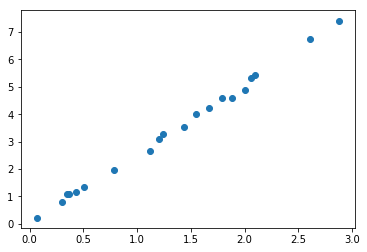

In [5]:
plt.scatter(X,t)

In [7]:
def likelihood(w):
    return np.exp((-1*beta/2)*(t-X.dot(w)).T.dot(t-X.dot(w)))

def prior(w):
    return np.exp((-1*alpha/2)*w**2)

In [9]:
proposal = s.norm(0,0.5)

def sample_step():
    return proposal.ppf(np.random.random())

In [15]:
W = np.zeros(10000)
W[0] = 0.0

In [16]:
for i in range(9999):
    w_cand = np.array(W[i] + sample_step(),ndmin=2)
    rho = min((likelihood(w_cand)*prior(w_cand))/(likelihood(W[i,None,None])*prior(W[i,None,None])),1)
    if np.random.uniform()<rho:
        #keep candidate
        W[i+1]=w_cand
    else:
        #discard, keep previous
        W[i+1]=W[i]

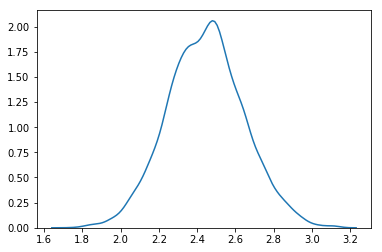

In [17]:
sns.kdeplot(W[200:])

In [18]:
wMap=np.mean(W[200:])
Sn = (alpha+beta*X.T.dot(X))**-1
mn = Sn*(beta*X.T.dot(t))
mn

array([[2.44701945]])

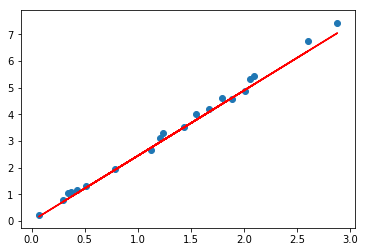

In [19]:
plt.plot(X,X*wMap, c='r')
plt.scatter(X,t)